In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as sps

# Задание 1.
Скачайте этот набор данных IKEA.

In [2]:
raw_dataset = pd.read_csv ('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv', index_col = [0])
raw_dataset.head()


,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


# Задание 2
Выполните исследовательский анализ для набора данных, включая описательную статистику и визуализации. Опишите результаты.

Этап 1. Подготовка

In [3]:
# Оценка имеющихся данных
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              2231 non-null   float64
 11  height             2706 non-null   float64
 12  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 378.8+ KB


Оценим, какой разброс значений по колонкам, и могут быть полезными или нет.

In [4]:
raw_dataset.sellable_online.value_counts()

True     3666
False      28
Name: sellable_online, dtype: int64

In [5]:
raw_dataset.designer.value_counts()

IKEA of Sweden                                                                                                                                                                                                                                                                                                                                                                                                                  828
Ehlén Johansson                                                                                                                                                                                                                                                                                                                                                                                                                 161
Francis Cayouette                                                                                                                                               

In [6]:
raw_dataset.old_price.value_counts()

No old price    3040
SR 995            12
SR 1,385          11
SR 595            10
SR 275             8
                ... 
SR 3,145           1
SR 39              1
SR 2,105           1
SR 752             1
SR 1,050           1
Name: old_price, Length: 365, dtype: int64

In [7]:
raw_dataset.short_description.value_counts()

        Chair                                     59
        Table,          120x60 cm                 40
        Table,          150x75 cm                 36
        Door,          60x64 cm                   30
        3-seat sofa                               30
                                                  ..
        Top and plinth,          40x47 cm          1
        Chest of 9 drawers,          160x99 cm     1
        Chest of 2 drawers,          40x99 cm      1
        Chest of 6 drawers,          80x99 cm      1
        1 section,          92x51x222-350 cm       1
Name: short_description, Length: 1706, dtype: int64

In [8]:
raw_dataset.item_id.value_counts() > 1

79241940     True
30247378     True
347888       True
60323592     True
20273141     True
            ...  
90309721    False
80265143    False
40238712    False
80433900    False
89157573    False
Name: item_id, Length: 2962, dtype: bool

In [9]:
raw_dataset[raw_dataset.item_id == 79241940]

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
41,79241940,NORRÅKER / NORRÅKER,Bar furniture,1385.0,No old price,True,https://www.ikea.com/sa/en/p/norraker-norraker...,No,"Bar table and 2 bar stools, 7...",J Karlsson/N Karlsson,NaN,104.0,74.0
1100,79241940,NORRÅKER / NORRÅKER,Café furniture,1385.0,No old price,True,https://www.ikea.com/sa/en/p/norraker-norraker...,No,"Bar table and 2 bar stools, 7...",J Karlsson/N Karlsson,NaN,104.0,74.0
1469,79241940,NORRÅKER / NORRÅKER,Chairs,1385.0,No old price,True,https://www.ikea.com/sa/en/p/norraker-norraker...,No,"Bar table and 2 bar stools, 7...",J Karlsson/N Karlsson,NaN,104.0,74.0
3164,79241940,NORRÅKER / NORRÅKER,Tables & desks,1385.0,No old price,True,https://www.ikea.com/sa/en/p/norraker-norraker...,No,"Bar table and 2 bar stools, 7...",J Karlsson/N Karlsson,NaN,104.0,74.0


В результате анализа делаем вывод, что в дальнейшем не понадобятся такие колонки как sellable_online (слишком малая выборка второго значения),  link (не поддается анализу), old_price (в основном везде No old price), name (уникально для товара и не несет аналитического значения)

Колонку designer в дальнейшем придется чистить из-за наличия специфических длинных значений

В наличии есть дубликаты по колонке item_id, которые связаны с отнесением одного и того же товара в одну категорию. Их чистить не будем, чтобы корректно определять средние значения по категории.

Также удалим строки, где нет вообще ни одного размера, для более точного дальнешего анализа.

In [10]:
dataset = raw_dataset.drop(['sellable_online', 'old_price', 'link', 'name'], axis=1).dropna(how='all', subset = ['depth', 'height', 'width']) 
dataset.head()

,item_id,category,price,other_colors,short_description,designer,depth,height,width
0,90420332,Bar furniture,265.0,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,Bar furniture,995.0,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
3,80155205,Bar furniture,69.0,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,Bar furniture,225.0,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
5,10122647,Bar furniture,345.0,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0


In [11]:
dataset[['price','depth','height', 'width' ]].describe()

,price,depth,height,width
count,3277.000000,2231.000000,2706.000000,3105.000000
mean,1098.838694,54.379202,101.679970,104.470853
std,1399.707539,29.958351,61.097585,71.133771
min,3.000000,1.000000,1.000000,1.000000
25%,195.000000,38.000000,67.000000,60.000000
50%,545.000000,47.000000,83.000000,80.000000
75%,1465.000000,60.000000,124.000000,140.000000
max,9585.000000,257.000000,700.000000,420.000000


In [12]:
group_set = dataset.groupby('category').agg(mean_price_c = ('price', 'mean'), counts_c = ('price', 'count'), mean_h_c = ('height', 'mean'), mean_d_c = ('depth', 'mean'), mean_w_c = ('width', 'mean') )
group_set

,mean_price_c,counts_c,mean_h_c,mean_d_c,mean_w_c
category,,,,,
Bar furniture,472.078947,38,97.571429,46.925926,52.945946
Beds,1719.959391,197,82.847134,81.734940,141.983784
Bookcases & shelving units,540.942967,519,131.097285,36.922737,106.563008
Cabinets & cupboards,848.583704,270,113.408696,37.493671,98.750000
Café furniture,468.739130,23,80.954545,44.785714,54.333333
Chairs,970.295610,410,76.837931,60.676259,66.156812
Chests of drawers & drawer units,612.180000,125,78.487805,47.157025,76.664000
Children's furniture,277.462810,121,75.857143,44.521277,63.000000
Nursery furniture,405.627660,94,84.821429,43.090909,64.709677


In [13]:
dst2 = dataset.merge(group_set, on = 'category')
dst2.head()

,item_id,category,price,other_colors,short_description,designer,depth,height,width,mean_price_c,counts_c,mean_h_c,mean_d_c,mean_w_c
0,90420332,Bar furniture,265.0,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,472.078947,38,97.571429,46.925926,52.945946
1,368814,Bar furniture,995.0,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,472.078947,38,97.571429,46.925926,52.945946
2,80155205,Bar furniture,69.0,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,472.078947,38,97.571429,46.925926,52.945946
3,30180504,Bar furniture,225.0,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,472.078947,38,97.571429,46.925926,52.945946
4,10122647,Bar furniture,345.0,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0,472.078947,38,97.571429,46.925926,52.945946


Для улучшения анализируемости исходя из присутствующих значений:
    
    1. Заполняем пустые значения размеров средними по категории товара 
    
    2. Добавляем несколько дополнительных расчетных столбцов (объем, наличие в дизайне только 'IKEA of Sweden')

In [14]:
m_df = pd.DataFrame(data = dst2[['mean_d_c', 'mean_h_c', 'mean_w_c']]).rename(columns = {'mean_d_c' : 'depth', 'mean_h_c' : 'height', 'mean_w_c' :'width'})
dst2[['depth', 'height', 'width']] = dst2[['depth', 'height', 'width']].fillna(value = m_df)

dst2['IKEA_des'] = 0
dst2.loc[dst2['designer'] == 'IKEA of Sweden', 'IKEA_des'] = 1

dst2[dst2.designer == 'IKEA of Sweden']
# dst2.groupby('IKEA_des').agg(mean_price_c = ('price', 'mean'))

dst2['volume'] = (dst2.depth * dst2.height * dst2.width).astype('int64')
dst2.head()

,item_id,category,price,other_colors,short_description,designer,depth,height,width,mean_price_c,counts_c,mean_h_c,mean_d_c,mean_w_c,IKEA_des,volume
0,90420332,Bar furniture,265.0,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,46.925926,99.0,51.0,472.078947,38,97.571429,46.925926,52.945946,0,236928
1,368814,Bar furniture,995.0,No,"Bar table, 140x80 cm",Francis Cayouette,46.925926,105.0,80.0,472.078947,38,97.571429,46.925926,52.945946,0,394177
2,80155205,Bar furniture,69.0,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.000000,100.0,60.0,472.078947,38,97.571429,46.925926,52.945946,0,300000
3,30180504,Bar furniture,225.0,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.000000,43.0,74.0,472.078947,38,97.571429,46.925926,52.945946,0,190920
4,10122647,Bar furniture,345.0,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.000000,91.0,40.0,472.078947,38,97.571429,46.925926,52.945946,0,163800


Визуализации для некоторых параметров:

price


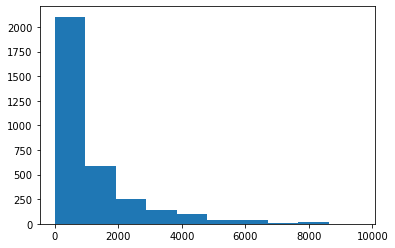

depth


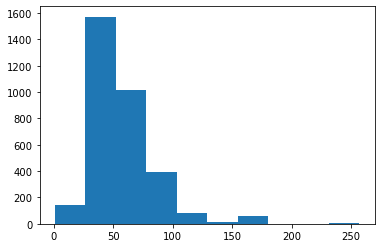

height


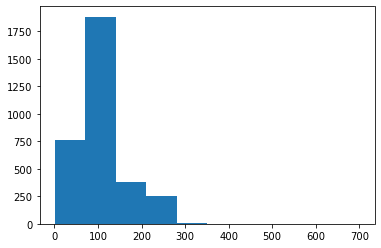

width


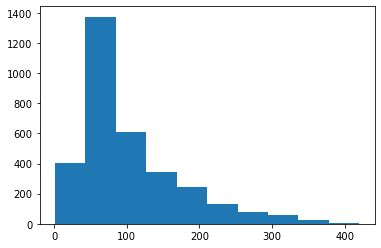

volume


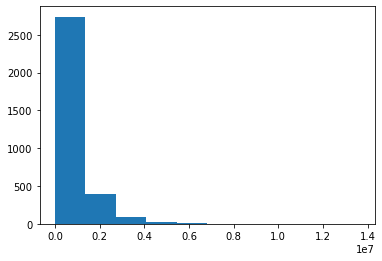

In [15]:
for с in ['price', 'depth', 'height', 'width', 'volume']:
    print(с)
    plt.hist(dst2[с])
    plt.show()

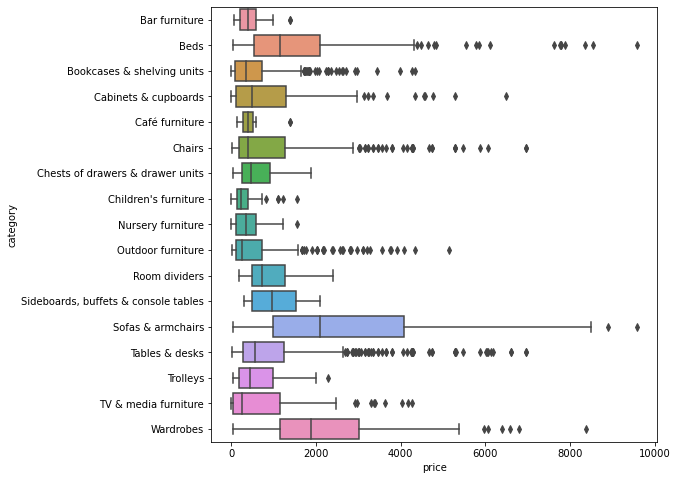

In [16]:
plt.subplots(figsize=(8,8))
sns.boxplot(data=dst2, x='price', y='category')
plt.show()

Так как в цене есть значительное количество выбросов средних значений, добавим очистку через определение IQR 

In [17]:
Q1 = dst2.price.quantile(0.25)
Q3 = dst2.price.quantile(0.75)
IQR = Q3 - Q1

fence_coef = 3
dataset_clean = dst2[~((dst2.price.astype(float) < (Q1 - fence_coef * IQR)) | (dst2.price.astype(float) > (Q3 + fence_coef * IQR)))]
dataset_clean.count()

item_id              3195
category             3195
price                3195
other_colors         3195
short_description    3195
designer             3195
depth                3195
height               3195
width                3195
mean_price_c         3195
counts_c             3195
mean_h_c             3195
mean_d_c             3195
mean_w_c             3195
IKEA_des             3195
volume               3195
dtype: int64

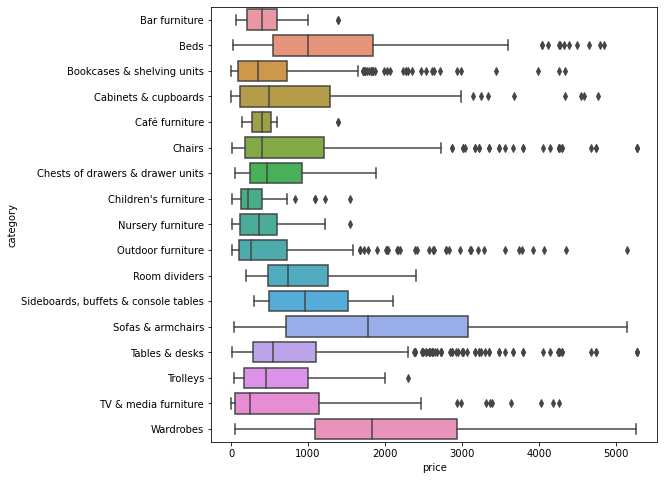

In [18]:
plt.subplots(figsize=(8,8))
sns.boxplot(data=dataset_clean, x='price', y='category')
plt.show()
    

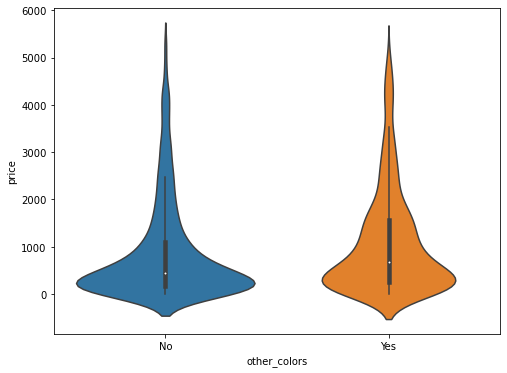

In [19]:
plt.subplots(figsize=(8,6))
sns.violinplot(data=dataset_clean, y='price', x='other_colors')
plt.show()

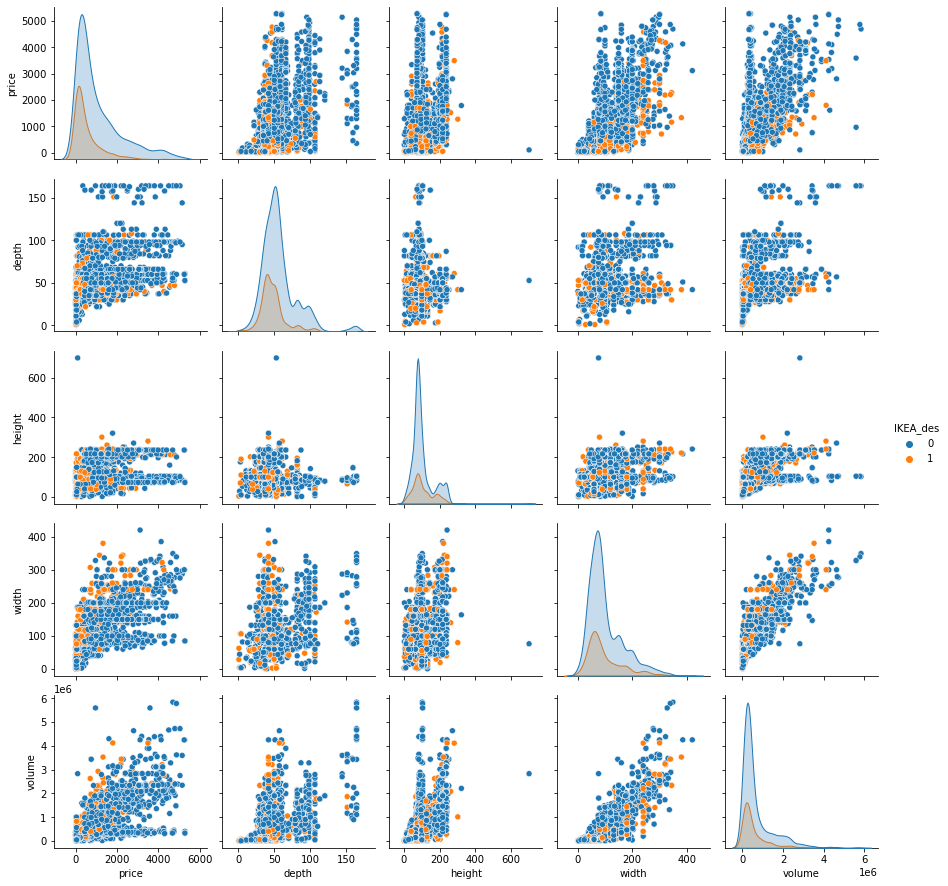

In [20]:
sns.pairplot(dataset_clean[['price','depth','height','width','IKEA_des','volume']], hue='IKEA_des')

По графикам наблюдается незначительное влияние графы "other color" на цену, и очевидное смещение массивов при добавлении разраничения по маркеру "Ikea design" - дизайнера не было указано

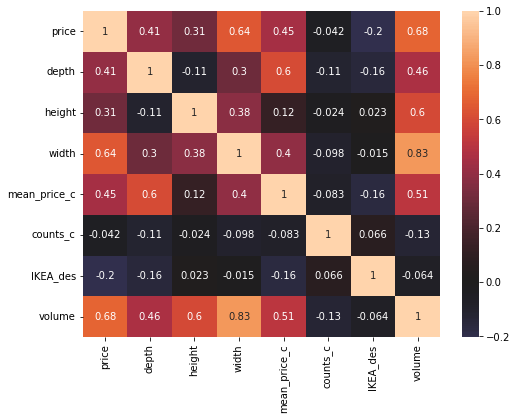

In [21]:
heatmap = dataset_clean.drop(['item_id', 'mean_h_c', 'mean_w_c', 'mean_d_c'], axis = 1)
plt.figure(figsize=(8,6))
sns.heatmap(heatmap.corr(), xticklabels=heatmap.corr().columns, yticklabels=heatmap.corr().columns, center=0, annot=True)
plt.show()

Вывод - Наибольшие корреляции наблюдаем между ценой и объемом, шириной

# Задание 3.

Основываясь на EDA и вашем здравом смысле, выберите две гипотезы, которые вы хотите проверить / проанализировать. Для каждой гипотезы перечислите нулевую гипотезу и другие возможные альтернативные гипотезы, разработайте тесты, чтобы различать их, и выполните их. Опишите результаты.

###  Гипотеза №1
По гистограмме цен можно было предположить, что цена имеет логнормальное распределение.  Построим гистограмму для логарифма цен и проверим гипотезу H_0 о том, что цены имеют логнормальное распределение.


(array([ 13.,  18.,  98., 195., 256., 432., 650., 621., 571., 341.]),
 array([0.47712125, 0.80163138, 1.1261415 , 1.45065162, 1.77516174,
        2.09967186, 2.42418198, 2.7486921 , 3.07320222, 3.39771234,
        3.72222246]),
 <BarContainer object of 10 artists>)

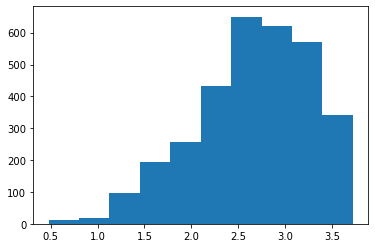

In [22]:
from scipy import stats

plt.hist(np.log10(dataset_clean.price))

In [23]:
h0_1_p_value = stats.shapiro(np.log10(dataset_clean.price)).pvalue
float(h0_1_p_value)

7.154073546265217e-25

По критерию p-value (намного меньше 0,05),  с большой долей уверенности критерий Шапиро нашу нулевую гипотезу отвергает. Для проверки, увеличим, количество корзин до 50

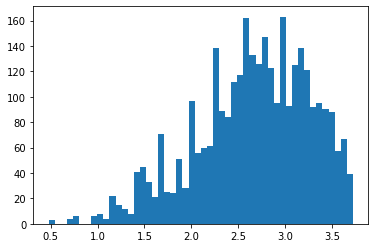

In [24]:
plt.hist(np.log10(dataset_clean.price), bins=50)
plt.show()

Много выбросов слева и справа от купола. Гипотеза о нормальном распределении цен оказалась не состоятельной.

### Гипотеза №2
Проверим гипотезу о том что цены на товары без указанного дизайнера 'IKEA_des' = 1 статистически не отличаются от цен на прочие товары.

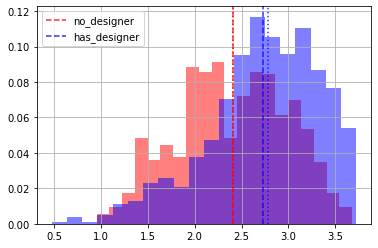

In [25]:
No_des = dataset_clean[dataset_clean['IKEA_des'] == 1]['price'].apply(np.log10)
Des = dataset_clean[dataset_clean['IKEA_des'] == 0]['price'].apply(np.log10)
No_des.name, Des.name = 'no_designer', 'has_designer'

No_des.hist(alpha=0.5, color='red', weights=[1./len(No_des)]*len(No_des), bins=20)
Des.hist(alpha=0.5, color='blue', weights=[1./len(Des)]*len(Des), bins=20)
plt.axvline(No_des.mean(), color='red', alpha=0.8, linestyle='dashed')
plt.axvline(Des.mean(), color='blue', alpha=0.8, linestyle='dashed')
plt.axvline(No_des.median(), color='red', alpha=0.8, linestyle='dotted')
plt.axvline(Des.median(), color='blue', alpha=0.8, linestyle='dotted')
plt.legend([No_des.name, Des.name])

In [26]:
stats.mannwhitneyu(No_des, Des).pvalue

2.2994173844291886e-40

критерий Манна-Уитни - p-value - меньше 0.01, гипотеза отвергнута. Разница цен на многоцветные и одноцветные товары статистически не значима. Так как распределение цен не существенно отличается от нормального вычислим p-значение t-теста Стьюдента.

In [27]:
stats.ttest_ind(No_des, Des, equal_var=False).pvalue

1.4574359861020775e-37

По критерию  Стьюдента - Данный тест также подтверждает несостоятельность нашей гипотезы.

# Задание 4. Обучите модель предсказывать цену на мебель.

### Посоветуйте, какие столбцы не следует включать в модель и почему.


`item_id`, `link` не нужны так как являются уникальными для каждого товара и никак не помогут спрогнозировать цену товара.

`short_description` и `name` - Эти поля не имеют под собой репрезентативного распределения выборки, и проанализировать их состав практически невозможно без точного описания алгоритма включения данной информации в датасет (например, есть ли там ключевые слова, вроде "эксклюзивный", "особый" и т.п. Поэтому мы не будем использовать их в нашей модели и их тоже можно удалить.

Также еще в начале мы удалили колонку `sellable_online`, так как она не репрезентативна:
```
value_counts()

True     3666
False      28
Name: sellable_online, dtype: int64
```

### Создайте пайплайн для кросс-валидации для обучения и оценки модели, включая (при необходимости) такие шаги, как присвоение пропущенных значений и нормализация.

На этапе EDA мы обнаружили, что некоторые поля имеют пустые значения или "мусор".

_Габариты_

Габариты имеют пустые значения. Есть несколько стратегий заполнения пустых значений габаритов.

1. Можно просто удалить все строки у которых имеются пустые значения.
2. Воспользоваться SimpleImputer библиотеки sklearn и заполнить пустые значения каким-то (например, медианным) значением. 
3. Наш вариант - заполнением колонок средним значением по категории (см. выше)

_Дизайнеры_

Колонка `designer` содержит "мусор" (строки начинающиеся с цифр), который надо будет удалить и как-то заполнить пустые значения. При более детальном рассмотрении можно увидеть, что некоторые товары разрабатывала группа дизайнеров, например 
```
Francis Cayouette/K Hagberg/M Hagberg
K Hagberg/M Hagberg/Francis Cayouette
```
и также можно заметить, что в данном случае строки разные, а состав дизайнеров один и тот же. Здравый смысл подсказывает, что необходимо привести все строки к одному виду, например, можно отсортировать имена дизайнеров по алфавиту.

In [28]:
'''
Процедура приведения колонки designer к "нормальному виду"
value - строка, состав дизайнеров
emptyValue - чем заменять неверные значения, можно попробовать менять на пустую строку или "IKEA of Sweden"
'''
def cleanDesigners(value, emptyValue='IKEA of Sweden'):
    #если это не строка возвращаем само значение
    if not isinstance(value, str):
        return value
    #если строка начинается на цифру, возвращаем пустое значение
    if len(value)>0 and value[0].isdigit():
        return emptyValue
    #разбиваем строку по / 
    designers = value.split("/")
    if len(designers) > 0:
        #возвращаем строку отсортированную по именам дизайнеров
        return '/'.join(sorted(designers))
    else:
        #или пустую строку если список пустой
        return emptyValue


Добавим новую колонку designer_clean - поле designer без мусора, с отсортированным списком дизайнеров. Пустые значения запролним "IKEA of Sweden"

Если колонка designer содержала 381 уникальное значение, то designer_clean - 183

In [29]:
dataset_clean['designer_clean'] = dataset_clean['designer'].apply(cleanDesigners) 
dataset_clean['designer_clean'].value_counts()

C:\Users\Evgeniy\AppData\Local\Temp/ipykernel_10356/136475005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['designer_clean'] = dataset_clean['designer'].apply(cleanDesigners)


IKEA of Sweden                                                     861
Ehlén Johansson/IKEA of Sweden                                     127
Jon Karlsson                                                       118
K Hagberg/M Hagberg                                                111
Ola Wihlborg                                                       111
                                                                  ... 
Eva Lilja Löwenhielm/Francis Cayouette                               1
Lars Norinder                                                        1
Ehlén Johansson/Fredriksson/Hilland/IKEA of Sweden/L Löwenhielm      1
A Fredriksson/IKEA of Sweden/J Hultqvist/W Chong                     1
Jooyeon Lee                                                          1
Name: designer_clean, Length: 183, dtype: int64

In [30]:
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Нам необходимо перевести категорийные переменные в цифровой вид. Так как категории товаров это неупорядоченные данные, то воспользуемся OneHotEncoder и построим соответствующий Pipeline

Так как мы хотим прогнозировать цену - вещественное число, то воспользуемся каким-нибудь из регрессоров, например деревом решений DecisionTreeRegressor()


In [31]:
X = dataset_clean[['depth','width','height','volume', 'IKEA_des', 'category','designer_clean','other_colors']]

Y = dataset_clean['price']
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
numeric_transf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])
 
categorical_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
 
col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth','width','height', 'volume']),
    ('categorical', categorical_transf, ['category','designer_clean','IKEA_des', 'other_colors'])
])
 
dtr = Pipeline(steps=[
    ('col_prep', col_prepr),
    ('dtr', DecisionTreeRegressor(max_depth = 10, random_state=42))
])
 
dtr.fit(X_train, Y_train)
dtr_predict = dtr.predict(X_test)
print('R^2 : {:.5f}'.format(dtr.score(X_test, Y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_predict, Y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_predict, Y_test))))

R^2 : 0.69910
MAE : 348.45873
MSE : 601.19510


Наша первая модель показала следующий результат:

R^2 : 0.69910
MAE : 348.45873
MSE : 601.19510
    
     
    Для упрощения подбора параметров выборок и модели создадим процедуру, которая будет принимать на вход выборки и расчитывать оценки для разных регрессоров

In [38]:
import numpy as np
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

def getBestRegressor(X, Y):
    X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
    models = [
        sk.linear_model.LinearRegression(),
        sk.linear_model.LassoCV(),
        sk.linear_model.RidgeCV(),
        sk.neighbors.KNeighborsRegressor(n_neighbors=16),
        sk.tree.DecisionTreeRegressor(max_depth=10, random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor()
    ]

    TestModels = pd.DataFrame()
    res = {}
    tmp = {}
    #для каждой модели из списка
    for model in models:
        #получаем имя модели
        m = str(model)
        # print (m)
        tmp['Model'] = m[:m.index('(')]    
        #обучаем модель
        model.fit(X_train, Y_train) 
        #вычисляем R^2 - коэффициент детерминации
        tmp['R^2'] = '{:.5f}'.format(model.score(X_test, Y_test))
        #вычисляем MAE - средний модуль отклонения 
        tmp['MAE'] = '{:.5f}'.format(sk.metrics.mean_absolute_error(model.predict(X_test), Y_test))
        #вычисляем RMSE - корень из среднего квадрата отклонения
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(model.predict(X_test), Y_test)))

        #записываем данные и итоговый DataFrame
        TestModels = TestModels.append([tmp])
    #делаем индекс по названию модели
    TestModels.set_index('Model', inplace=True)
    res['model'] = TestModels
    res['X_train'] = X_train
    res['Y_train'] = Y_train
    res['X_test'] = X_test
    res['Y_test'] = Y_test
    return res

Возможно есть смысл закодировать категории color, а дизайнеров  - по средней (медиана) ценой по категории.

Добавим в датафрейм новые поля:

In [39]:
dataset_clean['other_colors_1'] = dataset_clean['other_colors'].map(dict(Yes=1, No=0))

median_dsgn = dataset_clean.groupby(['designer_clean'])['price'].median()

dataset_clean = dataset_clean.set_index(['designer_clean'])
dataset_clean['designer_median_price'] = median_dsgn
dataset_clean = dataset_clean.reset_index()

dataset_clean.head()

,designer_clean,item_id,category,price,other_colors,short_description,designer,depth,height,width,mean_price_c,counts_c,mean_h_c,mean_d_c,mean_w_c,IKEA_des,volume,other_colors_1,designer_median_price
0,Nicholai Wiig Hansen,90420332,Bar furniture,265.0,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,46.925926,99.0,51.0,472.078947,38,97.571429,46.925926,52.945946,0,236928,0,265.0
1,Francis Cayouette,368814,Bar furniture,995.0,No,"Bar table, 140x80 cm",Francis Cayouette,46.925926,105.0,80.0,472.078947,38,97.571429,46.925926,52.945946,0,394177,0,334.0
2,Henrik Preutz,80155205,Bar furniture,69.0,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.000000,100.0,60.0,472.078947,38,97.571429,46.925926,52.945946,0,300000,1,423.0
3,Marcus Arvonen,30180504,Bar furniture,225.0,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.000000,43.0,74.0,472.078947,38,97.571429,46.925926,52.945946,0,190920,0,150.0
4,Carina Bengs,10122647,Bar furniture,345.0,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.000000,91.0,40.0,472.078947,38,97.571429,46.925926,52.945946,0,163800,0,995.0



Возьмем габариты расчитанные по медиане в разрезе категорий, категории и дизайнеры закодированны медианой цены. Проверим какой регрессор покажет лучший результат и как изменится оценка для модели на основе дерева решений.

In [40]:
X1 = dataset_clean[['depth','width','height','volume','IKEA_des', 'mean_price_c','designer_median_price','other_colors_1']]
Y1 = dataset_clean['price']

test1 = getBestRegressor(X1, Y1)
test1['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.83951,255.75303,439.05678
GradientBoostingRegressor,0.80325,306.11116,486.13224
DecisionTreeRegressor,0.72114,315.22084,578.75474
RidgeCV,0.69383,404.18121,606.42916
LinearRegression,0.69264,403.54049,607.60994
KNeighborsRegressor,0.56819,466.69456,720.18881
LassoCV,0.41492,547.99690,838.32308


Наилучший результат показал RandomForestRegressor. R^2 = 0.83951

Дерево решений для данных выборок так же показывает лучший результат R^2 = 0.72114 (было 0.69910)
Воспользуемся функцией GridSearchCV. Проведем кросс-валидацию и подберем оптимальные параметры для RandomForestRegressor

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Estimator : RandomForestRegressor(max_depth=100, max_features='sqrt')
Best Score     : 0.8534301297679618

R^2            : 0.84521
MAE            : 253.62690
RMSE           : 431.20129

Feature importance:
--------------------------------
0.08814    depth
0.20881    width
0.09305    height
0.26794    volume
0.00938    IKEA_des
0.07222    mean_price_c
0.24689    designer_median_price
0.01357    other_colors_1


<AxesSubplot:>

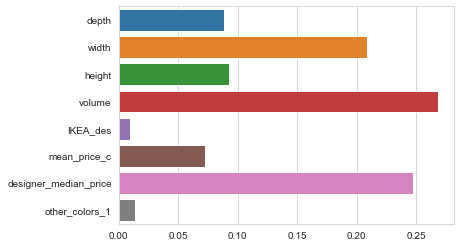

In [41]:
from sklearn.model_selection import GridSearchCV, cross_val_score

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X1, Y1, test_size=0.2, random_state=42)
forest_grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [100,500], 'max_depth': [10,100,None], 'max_features': ['auto','sqrt','log2']}, cv=5, n_jobs=-1, verbose=3)
forest_grid.fit(X_train, Y_train)

print('Best Estimator :',forest_grid.best_estimator_)
print('Best Score     :',forest_grid.best_score_)
print('')
print('R^2            : {:.5f}'.format(sk.metrics.r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE            : {:.5f}'.format(sk.metrics.mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('RMSE           : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('--------------------------------')
for feat, importance in zip(X_train.columns, forest_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))

sns.set_style('whitegrid')
sns.barplot(y=X_train.columns, x=forest_grid.best_estimator_.feature_importances_)

<AxesSubplot:xlabel='price'>

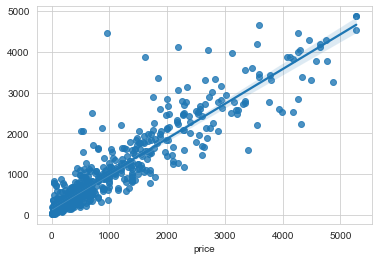

In [42]:
sns.regplot(x=Y_test, y=forest_grid.predict(X_test))

### Предложите методы повышения производительности модели. Опишите результаты.

Для улучшения качества модели необходимо улучшать качество данных.

Можно попробовать извлечь недостающие габариты из описания товара. 

Как видно из таблицы и графика важности переменных (feature importance) "дизайнеры" вносят довольно большой вклад. Можно поэкспериментировать с кодированием дизайнеров. В случае коллективной работы, надо разделить группу дизайнеров на отдельные имена и затем применить подход используемый в OneHotEncoder. Т.е. если у нас есть такие строки: три дизайнера `Carina Bengs`, `Ebba Strandmark` и `IKEA of Sweden`, но в разных составах
```
1.   Carina Bengs/Ebba Strandmark
2.   Ebba Strandmark
3.   Ebba Strandmark/IKEA of Sweden
```
три дизайнера - `Carina Bengs`, `Ebba Strandmark` и `IKEA of Sweden`, но в разных составах, то после применения энкодера мы должны получить
```
     CB   ES   IK
1.    1    1    0
2.    0    1    0   
3.    0    1    1
```


--------
В данном проекте мы оценили и изучили предоставленный набор данных, проверили гипотезы о распределениях параметров. Построили модель предсказания цен на мебель. В процессе обучения модели протестировали несколько стратегий заполнения недостающих данных, подобрали наилучший регрессор и его оптимальные параметры.